<a href="https://colab.research.google.com/github/farahschoolyr3/plant-disease-project/blob/main/Finale_Plant_Disease_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
img_path = os.getcwd() + r'\images'

In [2]:
base_dir = os.getcwd()+r'\PlantVillage'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_Corn____Cercospora_leaf_spot_Gray_leaf_spot_dir = os.path.join(train_dir, 'Corn____Cercospora_leaf_spot_Gray_leaf_spot')
train_Corn____Common_rust_dir = os.path.join(train_dir, 'Corn____Common_rust')
train_Corn____healthy_dir = os.path.join(train_dir, 'Corn____healthy')
train_Corn____Northern_Leaf_Blight_dir = os.path.join(train_dir, 'Corn____Northern_Leaf_Blight')

validation_Corn____Cercospora_leaf_spot_Gray_leaf_spot_dir = os.path.join(validation_dir, 'Corn____Cercospora_leaf_spot_Gray_leaf_spot')
validation_Corn____Common_rust_dir = os.path.join(validation_dir, 'Corn____Common_rust')
validation_Corn____healthy_dir = os.path.join(validation_dir, 'Corn____healthy')
validation_Corn____Northern_Leaf_Blight_dir = os.path.join(validation_dir, 'Corn____Northern_Leaf_Blight')

train_Corn____Cercospora_leaf_spot_Gray_leaf_spot_fnames = os.listdir("images/Corn___Cercospora_leaf_spot Gray_leaf_spot/")
train_Corn____Common_rust_fnames = os.listdir("images/Corn___Common_rust/")
train_Corn____healthy_fnames = os.listdir("images/Corn___healthy/")
train_Corn____Northern_Leaf_Blight_fnames = os.listdir("images/Corn___Northern_Leaf_Blight/")

NUMBER_OF_CLASS = 4

In [3]:

from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import os
import tensorflow_hub as hub
from keras.layers import Dense, Flatten, Conv2D,DepthwiseConv2D,Add,Input
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import layers
from keras import optimizers

In [4]:
import keras
from keras import backend as K
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [5]:
IMAGE_SIZE = (224, 224)
def prepare_image(file):
    img = image.load_img(file, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [6]:
from keras.preprocessing import image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [7]:
mobile = keras.applications.mobilenet.MobileNet()

In [8]:
IMAGE_SIZE = (224, 224)
def prepare_image(file):
    img = image.load_img(file, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobislenet.preprocess_input(img_array_expanded_dims)

In [9]:
from keras.preprocessing import image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [10]:
#imports the mobilenet model and discards the last 1000 neuron layer.
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224,224,3))

x=base_model.output
x=GlobalAveragePooling2D()(x)
#add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 1
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(4,activation='softmax')(x) #final layer with softmax activation

In [11]:
model=Model(inputs=base_model.input,outputs=preds)
print(base_model.input)

for i,layer in enumerate(model.layers):
  print(i,layer.name)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
0 input_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 c

In [12]:

for layer in model.layers[:88]:
    layer.trainable=False
for layer in model.layers[88:]:
    layer.trainable=True

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [14]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
BATCH_SIZE = 64

# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30, ###40,
    width_shift_range=0.1, ###0.2,
    height_shift_range=0.1, ###0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the val data should not be augmented!
test_datagen= ImageDataGenerator    (rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=IMAGE_SIZE, 
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        shuffle=True)

# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True)

Found 4036 images belonging to 4 classes.


Found 770 images belonging to 4 classes.


In [16]:
import scipy
EPOCHS = 10
step_size_train=train_generator.n//train_generator.batch_size
step_size_validation=validation_generator.n//validation_generator.batch_size
print(step_size_train)
print(step_size_validation)
history = model.fit(train_generator, steps_per_epoch=step_size_train, epochs=EPOCHS,
 validation_data=validation_generator, validation_steps=step_size_validation,
 shuffle=True)

63
12


Epoch 1/10
63/63 [==============================] - 135s 2s/step - loss: 0.2900 - accuracy: 0.8799 - val_loss: 0.1386 - val_accuracy: 0.9479
Epoch 2/10
63/63 [==============================] - 98s 2s/step - loss: 0.1763 - accuracy: 0.9315 - val_loss: 0.1846 - val_accuracy: 0.9141
Epoch 3/10
63/63 [==============================] - 106s 2s/step - loss: 0.1045 - accuracy: 0.9592 - val_loss: 0.1383 - val_accuracy: 0.9479
Epoch 4/10
63/63 [==============================] - 122s 2s/step - loss: 0.1030 - accuracy: 0.9597 - val_loss: 0.1215 - val_accuracy: 0.9466
Epoch 5/10
63/63 [==============================] - 126s 2s/step - loss: 0.0921 - accuracy: 0.9610 - val_loss: 0.1143 - val_accuracy: 0.9518
Epoch 6/10
63/63 [==============================] - 131s 2s/step - loss: 0.1021 - accuracy: 0.9592 - val_loss: 0.1116 - val_accuracy: 0.9453
Epoch 7/10
63/63 [==============================] - 130s 2s/step - loss: 0.0789 - accuracy: 0.9690 - val_loss: 0.1752 - val_accuracy: 0.9362
Epoch 8/10
63/

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']                               
val_acc = history.history['val_accuracy']

# Retrieve a list of loss results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label='training')
plt.plot(epochs, val_acc, 'b', label='validation')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label='training')
plt.plot(epochs, val_loss, 'b', label='validation')
plt.title('Training and validation loss')
plt.legend()



In [18]:
model.save("mnet_model1.h5")

c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
'''tf.keras.applications.MobileNetV3Large(
    input_shape=None,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
) '''

'tf.keras.applications.MobileNetV3Large(\n    input_shape=None,\n    alpha=1.0,\n    minimalistic=False,\n    include_top=True,\n    weights="imagenet",\n    input_tensor=None,\n    classes=1000,\n    pooling=None,\n    dropout_rate=0.2,\n    classifier_activation="softmax",\n    include_preprocessing=True,\n) '

In [20]:
model = tf.keras.models.load_model('mnet_model1.h5',custom_objects={'KerasLayer':hub.KerasLayer})
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [21]:
class_names=['Corn____Cercospora_leaf_spot_Gray_leaf_spot', 'Corn____Common_rust', 'Corn____healthy', 'Corn____Northern_Leaf_Blight']

In [22]:
import glob
list_of_files = glob.glob(test_dir+'/*.JPG')
print(len(list_of_files))
print(test_dir)

5
d:\MP 3\Final cut\PlantVillage\test


C:\Users\win10\AppData\Local\Temp\ipykernel_12784\1076929048.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_number = int(np.random.randint(0, len(list_of_files), size=1))


1/1 [==============================] - 1s 1s/step
[1.6399797e-08 9.9999988e-01 7.9332871e-08 5.1849227e-09]
prediction= 1


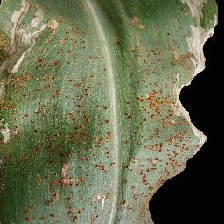

In [23]:
# Randomly choose a picture to test your model
img_number = int(np.random.randint(0, len(list_of_files), size=1))
test_image = list_of_files[img_number]


new_image = load_image(test_image)

pred = model.predict(new_image)
print(pred[0])

prediction_result = np.argmax(pred[0])
print('prediction=',prediction_result)

img = image.load_img(test_image,target_size=IMAGE_SIZE)
img

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Convert one-hot encoded labels to class indices
y_true = np.argmax(validation_generator.classes, axis=1)

# Predict classes for validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred_classes, classes=class_labels, title='Confusion Matrix')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred_classes, classes=class_labels, normalize=True, title='Normalized Confusion Matrix')

plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\win10\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\win10\AppData\Local\Temp\ipykernel_14564\654957087.py", line 54, in <module>
    y_true = np.argmax(validation_generator.classes, axis=1)
                       ^^^^^^^^^^^^^^^^^^^^
NameError: name 'validation_generator' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\win10\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\win10\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^

In [2]:
from sklearn.metrics import roc_curve, auc

# Convert one-hot encoded labels to binary format
y_true_binary = label_binarize(y_true, classes=np.arange(NUMBER_OF_CLASS))

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUMBER_OF_CLASS):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(NUMBER_OF_CLASS):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\win10\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\win10\AppData\Local\Temp\ipykernel_14564\3065819246.py", line 4, in <module>
    y_true_binary = label_binarize(y_true, classes=np.arange(NUMBER_OF_CLASS))
                    ^^^^^^^^^^^^^^
NameError: name 'label_binarize' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\win10\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\win10\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
           